In [17]:
# Importing Libraries
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Import Dataset
df = pd.read_csv('ex1data1.csv')

X = torch.tensor(df['W'].values).reshape(df['W'].shape[0], 1)
y = torch.tensor(df['Y'].values).reshape(df['Y'].shape[0], 1)

X = X.float()
y = y.float()

In [25]:
# Linear Regression Model
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.linear = torch.nn.Linear(n_features, 1)
    
    def forward(self, x):
        return self.linear(x)
  
    def train(self, X, y, EPOCHS, learning_rate, verbose):
        criterion = torch.nn.MSELoss()
        optimizer = torch.optim.SGD(self.parameters(), lr = learning_rate)

        for epoch in range(EPOCHS):
            # Forward Pass
            y_pred = self(X)
            loss = criterion(y_pred, y)

            # Backward Pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if epoch % (EPOCHS // verbose) == 0: 
                print(f"Epoch : {epoch} | loss : {loss}")

        print(f"Epoch : {EPOCHS} | loss : {loss}")


In [26]:
# Function to plot best fit curve
def plot_curve(X, y, model):
    y_pred = []

    curve_start, _ = torch.min(X, 0)
    curve_end, _ = torch.max(X, 0) 

    curve_start = int(curve_start.item()) - 2
    curve_end = int(curve_end.item()) + 2

    for x in range(curve_start, curve_end):
        x = torch.Tensor([x])
        y_pred.append(model(x))
    plt.title("Labels vs Features")
    plt.xlabel("Features")
    plt.ylabel("Labels / Predictions")
    plt.scatter(X, y)
    plt.plot(range(curve_start, curve_end), y_pred, 'k')
    plt.show()

Epoch : 0 | loss : 68.39566040039062
Epoch : 100 | loss : 9.850844383239746
Epoch : 200 | loss : 9.389491081237793
Epoch : 300 | loss : 9.165451049804688
Epoch : 400 | loss : 9.056654930114746
Epoch : 500 | loss : 9.003820419311523
Epoch : 600 | loss : 8.978163719177246
Epoch : 700 | loss : 8.965704917907715
Epoch : 800 | loss : 8.959654808044434
Epoch : 900 | loss : 8.95671558380127
Epoch : 1000 | loss : 8.955299377441406


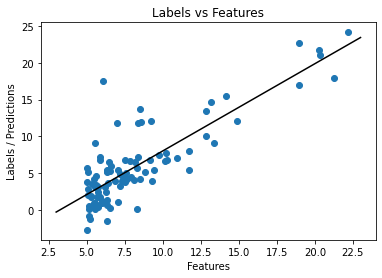

In [28]:
# Model Instance
linear_regression_model = LinearRegressionModel(1)
linear_regression_model.train(X, y, EPOCHS = 1000, learning_rate = 0.01, verbose = 10)


# Plotting to see the curve
plot_curve(X, y, linear_regression_model)
